In [1]:
#pip install numpy pandas matplotlib seaborn scikit-learn tensorflow

# **importing some libraries required for classification**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing

In [3]:
data=pd.read_csv('/kaggle/input/mocap-allusers/allUsers.lcl.csv')


In [4]:
data.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2
count,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000
mean,2.983738,7.959127,50.345664,85.812051,-29.984712,49.595209,86.192647,-29.509202,48.612121,83.771315,-30.560515
std,1.421183,4.697810,32.696173,40.204363,34.361918,32.478238,40.453214,34.764398,33.605390,41.023543,35.120329
min,0.000000,0.000000,-108.552738,-98.233756,-126.770872,-111.685241,-96.142589,-166.006838,-106.886524,-100.789312,-129.595296
25%,2.000000,5.000000,29.295062,63.494432,-56.356438,28.755137,64.154529,-57.360107,25.170006,58.052385,-58.654059
50%,3.000000,9.000000,54.619964,86.526246,-30.864125,54.215514,87.542751,-30.184005,53.814580,86.458324,-32.352414
75%,4.000000,12.000000,72.488686,113.107355,-1.418803,71.762039,116.219398,-0.366692,71.561951,106.660827,-0.944786
max,5.000000,14.000000,190.017835,169.175464,113.345119,188.691997,170.209350,104.697852,188.760168,168.186466,104.590879


In [5]:
#dfs.to_excel("dataa.xlsx")

In [6]:
data.columns = list(range(len(data.columns)))
col=data.columns
col

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37],
           dtype='int64')

In [7]:
columns_to_drop = [23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]  
data.drop(columns=columns_to_drop, inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019,?,?,?,?,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78091,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,4.07501825540343,26.0308784490985,136.368236497962,-32.7923925965895,77.2937098066631,34.0708569530435,-43.2637900001125,-30.2822013321426,77.6223061447627,-17.15029172919
78092,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-53.0072437045207,26.4469428817139,135.82349439399,-33.8514248055691,-1.09067420384509,122.724914373665,-46.5583729086904,-1.95850220442059,98.2889311555066,4.24833369793896
78093,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,-17.3548436885736,26.5066400161928,135.605902859879,-34.4414628755671,61.4753314934401,101.321181459117,-6.61698844268879,-1.12573832398984,122.6140268058,-46.7960541509443
78094,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-34.6757739677746,-22.3294952272238,104.026431451371,-54.3346226872107,61.6393864623392,101.224661857702,-6.8409418109905,54.0099616832869,129.477879104126,-43.9678201146984


In [8]:
data.columns = list(range(len(data.columns)))
col=data.columns
col

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22],
           dtype='int64')

In [9]:
data.drop(data[data[ 0 ] == 0].index, inplace=True)
data.drop(data[data[ 0 ] == '?'].index, inplace=True)
data.drop(data[data[ 1 ] == '?'].index, inplace=True)
data.drop(data[data[ 2 ] == '?'].index, inplace=True)
data.drop(data[data[ 3 ] == '?'].index, inplace=True)
data.drop(data[data[ 4 ] == '?'].index, inplace=True)
data.drop(data[data[ 5 ] == '?'].index, inplace=True)
data.drop(data[data[ 6 ] == '?'].index, inplace=True)
data.drop(data[data[ 7 ] == '?'].index, inplace=True)
data.drop(data[data[ 8 ] == '?'].index, inplace=True)
data.drop(data[data[ 9 ] == '?'].index, inplace=True)
data.drop(data[data[ 10 ] == '?'].index, inplace=True)
data.drop(data[data[ 11 ] == '?'].index, inplace=True)
data.drop(data[data[ 12 ] == '?'].index, inplace=True)
data.drop(data[data[ 13 ] == '?'].index, inplace=True)
data.drop(data[data[ 14 ] == '?'].index, inplace=True)
data.drop(data[data[ 15 ] == '?'].index, inplace=True)
data.drop(data[data[ 16 ] == '?'].index, inplace=True)
data.drop(data[data[ 17 ] == '?'].index, inplace=True)
data.drop(data[data[ 18 ] == '?'].index, inplace=True)
data.drop(data[data[ 19 ] == '?'].index, inplace=True)
data.drop(data[data[ 20 ] == '?'].index, inplace=True)
data.drop(data[data[ 21 ] == '?'].index, inplace=True)
data.drop(data[data[ 22 ] == '?'].index, inplace=True)


data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
1654,1,0,-11.632335,81.551968,-28.007209,73.564324,51.161458,-70.505689,86.213513,75.013944,...,-56.2154522902372,32.2984892072433,91.5360396435441,-44.0743871801424,9.92719635250188,89.3756053345133,-31.6501312425115,7.34923543195405,24.9862732677858,10.2428080013854
1655,1,0,72.692270,50.023771,-72.963253,-11.593076,81.234142,-28.450210,51.729995,82.844469,...,-69.7342981118982,30.760697382696,90.4491696415814,-47.9095106182335,10.0284391929149,88.9679786863632,-32.0451200624497,7.73251054087557,25.135414843299,10.7233952361419
1656,1,0,85.648015,73.561022,-71.838316,31.595034,90.217896,-47.246688,52.230858,82.361548,...,-70.1118284111086,-8.90628847947269,81.5167927599509,-25.2439142696141,10.2775163462491,88.6079577405045,-32.0375389006328,56.3088290880038,18.7747679142722,-70.9965231015097
1657,1,0,52.895241,82.454113,-55.683891,32.285729,90.277753,-46.444718,89.077013,74.655391,...,-22.302190491041,5.7165380800747,24.4084028559536,7.77220505394253,76.3888808023934,50.6150565868792,-67.772758579423,56.5881764930507,18.5380486853742,-70.8212291698613
1659,1,0,51.874242,82.509948,-56.138338,-9.177149,81.411469,-25.398447,76.251197,50.602365,...,-46.3213660327158,5.99293400228724,24.4486547593206,8.07013900151556,58.9863532908359,20.0609402463142,-65.2250536748152,87.3569292461206,73.7462524221128,-68.2950376409761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78091,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,4.07501825540343,26.0308784490985,136.368236497962,-32.7923925965895,77.2937098066631,34.0708569530435,-43.2637900001125,-30.2822013321426,77.6223061447627,-17.15029172919
78092,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-53.0072437045207,26.4469428817139,135.82349439399,-33.8514248055691,-1.09067420384509,122.724914373665,-46.5583729086904,-1.95850220442059,98.2889311555066,4.24833369793896
78093,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,-17.3548436885736,26.5066400161928,135.605902859879,-34.4414628755671,61.4753314934401,101.321181459117,-6.61698844268879,-1.12573832398984,122.6140268058,-46.7960541509443
78094,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-34.6757739677746,-22.3294952272238,104.026431451371,-54.3346226872107,61.6393864623392,101.224661857702,-6.8409418109905,54.0099616832869,129.477879104126,-43.9678201146984


In [10]:
print("Total missing values:", data.isna().sum().sum())
data = data.dropna(how='any',axis=0)
# I have cleaned the data thorugh excel sheets by:
# removing rows and columns with very few values  
data
#print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
1654,1,0,-11.632335,81.551968,-28.007209,73.564324,51.161458,-70.505689,86.213513,75.013944,...,-56.2154522902372,32.2984892072433,91.5360396435441,-44.0743871801424,9.92719635250188,89.3756053345133,-31.6501312425115,7.34923543195405,24.9862732677858,10.2428080013854
1655,1,0,72.692270,50.023771,-72.963253,-11.593076,81.234142,-28.450210,51.729995,82.844469,...,-69.7342981118982,30.760697382696,90.4491696415814,-47.9095106182335,10.0284391929149,88.9679786863632,-32.0451200624497,7.73251054087557,25.135414843299,10.7233952361419
1656,1,0,85.648015,73.561022,-71.838316,31.595034,90.217896,-47.246688,52.230858,82.361548,...,-70.1118284111086,-8.90628847947269,81.5167927599509,-25.2439142696141,10.2775163462491,88.6079577405045,-32.0375389006328,56.3088290880038,18.7747679142722,-70.9965231015097
1657,1,0,52.895241,82.454113,-55.683891,32.285729,90.277753,-46.444718,89.077013,74.655391,...,-22.302190491041,5.7165380800747,24.4084028559536,7.77220505394253,76.3888808023934,50.6150565868792,-67.772758579423,56.5881764930507,18.5380486853742,-70.8212291698613
1659,1,0,51.874242,82.509948,-56.138338,-9.177149,81.411469,-25.398447,76.251197,50.602365,...,-46.3213660327158,5.99293400228724,24.4486547593206,8.07013900151556,58.9863532908359,20.0609402463142,-65.2250536748152,87.3569292461206,73.7462524221128,-68.2950376409761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78091,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,4.07501825540343,26.0308784490985,136.368236497962,-32.7923925965895,77.2937098066631,34.0708569530435,-43.2637900001125,-30.2822013321426,77.6223061447627,-17.15029172919
78092,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-53.0072437045207,26.4469428817139,135.82349439399,-33.8514248055691,-1.09067420384509,122.724914373665,-46.5583729086904,-1.95850220442059,98.2889311555066,4.24833369793896
78093,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,-17.3548436885736,26.5066400161928,135.605902859879,-34.4414628755671,61.4753314934401,101.321181459117,-6.61698844268879,-1.12573832398984,122.6140268058,-46.7960541509443
78094,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-34.6757739677746,-22.3294952272238,104.026431451371,-54.3346226872107,61.6393864623392,101.224661857702,-6.8409418109905,54.0099616832869,129.477879104126,-43.9678201146984


In [11]:
data = data.drop_duplicates()

data


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
1654,1,0,-11.632335,81.551968,-28.007209,73.564324,51.161458,-70.505689,86.213513,75.013944,...,-56.2154522902372,32.2984892072433,91.5360396435441,-44.0743871801424,9.92719635250188,89.3756053345133,-31.6501312425115,7.34923543195405,24.9862732677858,10.2428080013854
1655,1,0,72.692270,50.023771,-72.963253,-11.593076,81.234142,-28.450210,51.729995,82.844469,...,-69.7342981118982,30.760697382696,90.4491696415814,-47.9095106182335,10.0284391929149,88.9679786863632,-32.0451200624497,7.73251054087557,25.135414843299,10.7233952361419
1656,1,0,85.648015,73.561022,-71.838316,31.595034,90.217896,-47.246688,52.230858,82.361548,...,-70.1118284111086,-8.90628847947269,81.5167927599509,-25.2439142696141,10.2775163462491,88.6079577405045,-32.0375389006328,56.3088290880038,18.7747679142722,-70.9965231015097
1657,1,0,52.895241,82.454113,-55.683891,32.285729,90.277753,-46.444718,89.077013,74.655391,...,-22.302190491041,5.7165380800747,24.4084028559536,7.77220505394253,76.3888808023934,50.6150565868792,-67.772758579423,56.5881764930507,18.5380486853742,-70.8212291698613
1659,1,0,51.874242,82.509948,-56.138338,-9.177149,81.411469,-25.398447,76.251197,50.602365,...,-46.3213660327158,5.99293400228724,24.4486547593206,8.07013900151556,58.9863532908359,20.0609402463142,-65.2250536748152,87.3569292461206,73.7462524221128,-68.2950376409761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78091,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,4.07501825540343,26.0308784490985,136.368236497962,-32.7923925965895,77.2937098066631,34.0708569530435,-43.2637900001125,-30.2822013321426,77.6223061447627,-17.15029172919
78092,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-53.0072437045207,26.4469428817139,135.82349439399,-33.8514248055691,-1.09067420384509,122.724914373665,-46.5583729086904,-1.95850220442059,98.2889311555066,4.24833369793896
78093,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,-17.3548436885736,26.5066400161928,135.605902859879,-34.4414628755671,61.4753314934401,101.321181459117,-6.61698844268879,-1.12573832398984,122.6140268058,-46.7960541509443
78094,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-34.6757739677746,-22.3294952272238,104.026431451371,-54.3346226872107,61.6393864623392,101.224661857702,-6.8409418109905,54.0099616832869,129.477879104126,-43.9678201146984


In [12]:
data.dtypes


0       int64
1       int64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11     object
12     object
13     object
14     object
15     object
16     object
17     object
18     object
19     object
20     object
21     object
22     object
dtype: object

5    15406
2    14761
4    13018
3     6423
1     2639
Name: 0, dtype: int64


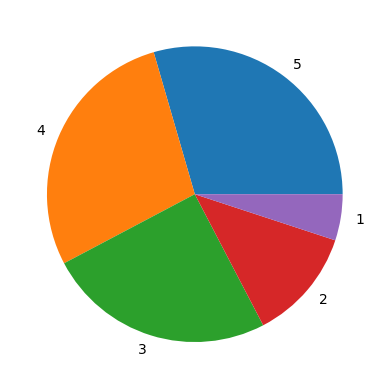

In [13]:

import matplotlib.pyplot as plt
import numpy as np

chart=data[0].value_counts()
print(chart)
count = np.array([15406, 14761, 13018, 6423,2639])
mylabels = [5, 4, 3, 2,1]

plt.pie(count, labels = mylabels)
plt.show() 

## **splitting**


In [14]:
# the target variable is in the first column
X = data.iloc[:, 1:]  # Features (excluding the first column)
y = data.iloc[:, 0]  # Target variable (first column)
#y2= data.iloc[:, 1]
print("X\n",X,"\n\n")
print("y\n",y,"\n\n")

X
        1          2           3          4          5           6          7   \
1654    0 -11.632335   81.551968 -28.007209  73.564324   51.161458 -70.505689   
1655    0  72.692270   50.023771 -72.963253 -11.593076   81.234142 -28.450210   
1656    0  85.648015   73.561022 -71.838316  31.595034   90.217896 -47.246688   
1657    0  52.895241   82.454113 -55.683891  32.285729   90.277753 -46.444718   
1659    0  51.874242   82.509948 -56.138338  -9.177149   81.411469 -25.398447   
...    ..        ...         ...        ...        ...         ...        ...   
78091  14  54.251127  129.177414 -44.252511  27.720784  107.810661  11.099282   
78092  14  54.334883  129.253842 -44.016320  27.767911  107.914808  11.069842   
78093  14  54.151540  129.269502 -44.173273  27.725978  108.034006  11.020347   
78094  14  27.915311  108.007390  10.814957  -0.910435  122.464093 -47.271248   
78095  14  27.898705  108.092877  11.107857 -30.031402   77.740235 -17.453099   

              8         

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(len(X))      # 52247
print(len(X_train)) # 41797
print(len(X_test))  # 10450

52247
41797
10450


In [16]:
X_train.shape


(41797, 22)

In [17]:
print(X.shape)  # Check the shape of X
print(y.shape)  # Check the shape of y
# print(y2.shape)

(52247, 22)
(52247,)


In [18]:
accuracy_arr = []#poly svm, random forest, knn, mlp,gaussian NB

# **poly svm**

Accuracy: 0.9555023923444976


              precision    recall  f1-score   support

           1       0.91      0.99      0.95       536
           2       0.96      0.93      0.95      2873
           3       0.92      0.97      0.94      1283
           4       0.96      0.95      0.96      2618
           5       0.97      0.97      0.97      3140

    accuracy                           0.96     10450
   macro avg       0.94      0.96      0.95     10450
weighted avg       0.96      0.96      0.96     10450



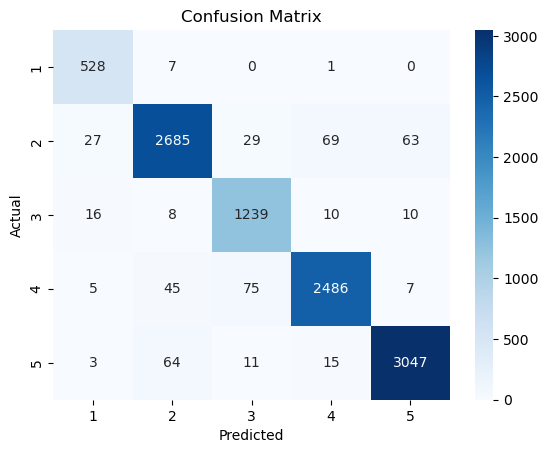

In [19]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


# Create an SVM classifier with polynomial kernel
svm = SVC(kernel='poly', degree=9)#trying with different values of degree

# Train the classifier
svm.fit(X_train, y_train)

# Predict the classes for the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_arr.append(accuracy)

print(f"Accuracy: {accuracy}\n\n")

print(classification_report(y_test, y_pred))



cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], ["1", "2","3","4","5"])
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5], ["1", "2","3","4","5"])
plt.show()

# **random forest**

Accuracy: 0.9845933014354067 


              precision    recall  f1-score   support

           1       1.00      0.98      0.99       536
           2       0.98      0.98      0.98      2873
           3       0.98      0.97      0.98      1283
           4       0.98      0.98      0.98      2618
           5       0.98      1.00      0.99      3140

    accuracy                           0.98     10450
   macro avg       0.99      0.98      0.98     10450
weighted avg       0.98      0.98      0.98     10450



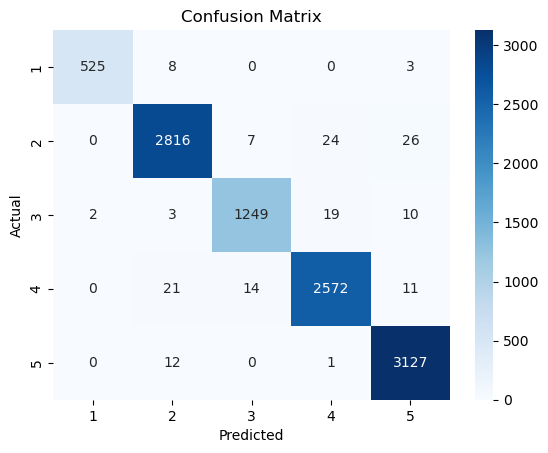

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy,"\n\n")
accuracy_arr.append(accuracy)


print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], ["1", "2","3","4","5"])
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5], ["1", "2","3","4","5"])
plt.show()

In [21]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score,mean_squared_error


# # Create a Random Forest Classifier
# clf = RandomForestClassifier(n_estimators=100, random_state=42)

# from sklearn.model_selection import cross_val_score

# # Train the model using the training data
# clf.fit(X_train, y_train)

# from sklearn.metrics import mean_absolute_error,make_scorer
# mae_scorer=make_scorer(mean_absolute_error)

# n= X.shape[0]

# cv_results=cross_val_score(
#     estimator=clf,
#     X=X,
#     y=y,
#     cv=n,
#     scoring=mae_scorer
# )
# print(cv_results)
# print(format(cv_results.mean()))
# print(format(cv_results.std()))

# **KNN**

Accuracy: 0.8725358851674642


              precision    recall  f1-score   support

           1       0.91      0.98      0.95       536
           2       0.85      0.87      0.86      2873
           3       0.81      0.87      0.84      1283
           4       0.83      0.88      0.85      2618
           5       0.97      0.85      0.90      3140

    accuracy                           0.87     10450
   macro avg       0.87      0.89      0.88     10450
weighted avg       0.88      0.87      0.87     10450



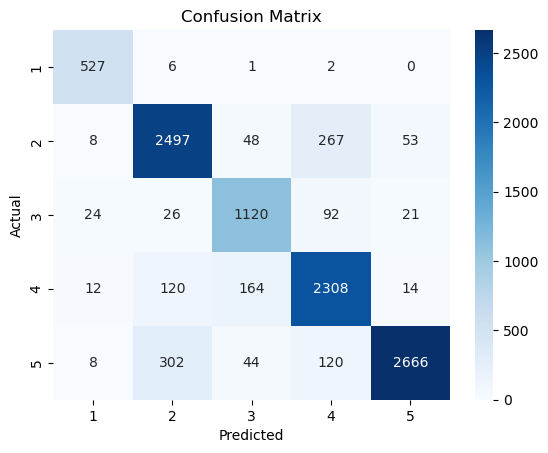

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)  # You can adjust the number of neighbors as needed

# Train the classifier
knn.fit(X_train, y_train)

# Predict the classes for the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_arr.append(accuracy)

print(f"Accuracy: {accuracy}\n\n")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], ["1", "2","3","4","5"])
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5], ["1", "2","3","4","5"])
plt.show()

# multilayer perceptron

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9577033492822966


              precision    recall  f1-score   support

           1       0.99      0.98      0.98       536
           2       0.96      0.93      0.95      2873
           3       0.93      0.97      0.95      1283
           4       0.96      0.95      0.95      2618
           5       0.96      0.98      0.97      3140

    accuracy                           0.96     10450
   macro avg       0.96      0.96      0.96     10450
weighted avg       0.96      0.96      0.96     10450



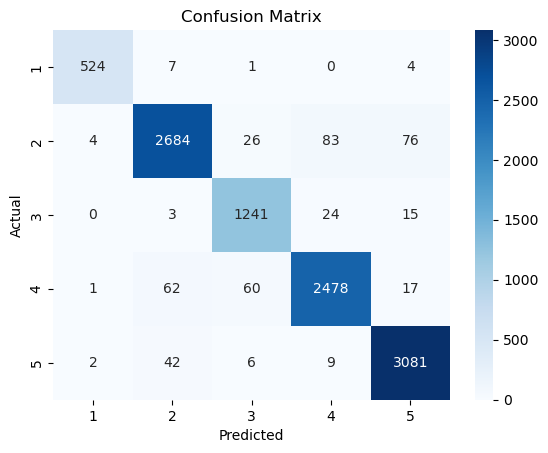

In [23]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier()



# Train the classifier
mlp.fit(X_train, y_train)

# Predict the classes for the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_arr.append(accuracy)

print(f"Accuracy: {accuracy}\n\n")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], ["1", "2","3","4","5"])
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5], ["1", "2","3","4","5"])
plt.show()

# naive Bayes Classifier

Accuracy: 0.700287081339713


              precision    recall  f1-score   support

           1       0.98      0.95      0.96       536
           2       0.71      0.80      0.75      2873
           3       0.63      0.38      0.48      1283
           4       0.61      0.68      0.64      2618
           5       0.75      0.72      0.73      3140

    accuracy                           0.70     10450
   macro avg       0.73      0.70      0.71     10450
weighted avg       0.70      0.70      0.70     10450



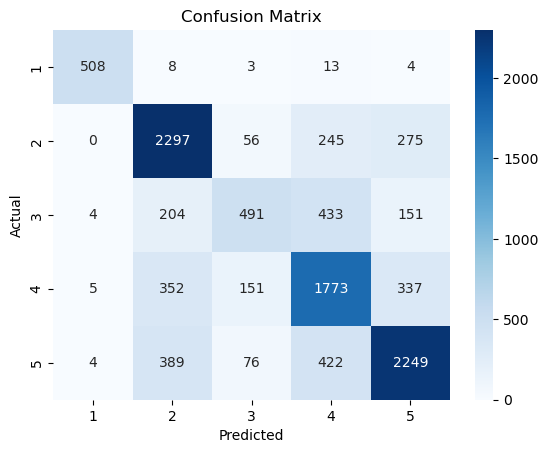

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()




# Train the classifier
gnb.fit(X_train, y_train)

# Predict the classes for the test set
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_arr.append(accuracy)

print(f"Accuracy: {accuracy}\n\n")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], ["1", "2","3","4","5"])
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5], ["1", "2","3","4","5"])
plt.show()

# evaluate

In [27]:
accuracy_arr


[0.9555023923444976,
 0.9845933014354067,
 0.8725358851674642,
 0.9577033492822966,
 0.700287081339713,
 0.5735885167464115,
 0.5932057416267943]

#  evaluation using leave one group out strategy

In [10]:
data2=pd.read_csv('/kaggle/input/molap-data-preprocessed/preprocessed data.csv')
data3=pd.read_csv('/kaggle/input/molap-data-preprocessed/preprocessed data.csv')
data4=pd.read_csv('/kaggle/input/molap-data-preprocessed/preprocessed data.csv')

In [3]:
data2

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6
0,1,0,-11.632335,81.551968,-28.007209,73.564324,51.161458,-70.505689,86.213513,75.013944,...,-56.215452,32.298489,91.536040,-44.074387,9.927196,89.375605,-31.650131,7.349235,24.986273,10.242808
1,1,0,72.692270,50.023771,-72.963253,-11.593076,81.234142,-28.450210,51.729995,82.844469,...,-69.734298,30.760697,90.449170,-47.909511,10.028439,88.967979,-32.045120,7.732511,25.135415,10.723395
2,1,0,85.648015,73.561022,-71.838316,31.595034,90.217896,-47.246688,52.230858,82.361548,...,-70.111828,-8.906288,81.516793,-25.243914,10.277516,88.607958,-32.037539,56.308829,18.774768,-70.996523
3,1,0,52.895241,82.454113,-55.683891,32.285729,90.277753,-46.444718,89.077013,74.655391,...,-22.302190,5.716538,24.408403,7.772205,76.388881,50.615057,-67.772759,56.588176,18.538049,-70.821229
4,1,0,51.874242,82.509948,-56.138338,-9.177149,81.411469,-25.398447,76.251197,50.602365,...,-46.321366,5.992934,24.448655,8.070139,58.986353,20.060940,-65.225054,87.356929,73.746252,-68.295038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52242,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,4.075018,26.030878,136.368236,-32.792393,77.293710,34.070857,-43.263790,-30.282201,77.622306,-17.150292
52243,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-53.007244,26.446943,135.823494,-33.851425,-1.090674,122.724914,-46.558373,-1.958502,98.288931,4.248334
52244,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,-17.354844,26.506640,135.605903,-34.441463,61.475331,101.321181,-6.616988,-1.125738,122.614027,-46.796054
52245,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-34.675774,-22.329495,104.026432,-54.334623,61.639386,101.224662,-6.840942,54.009962,129.477879,-43.967820


In [15]:
#data3.columns = list(range(len(data.columns)))
# group_criteria
# unique_groups[1:]

array([ 1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [16]:
data2.columns
data2.columns = list(range(len(data2.columns)))

X2 = data2.iloc[:, 1:]  # Features (excluding the first column)
y2 = data2.iloc[:, 0]
# columns_to_drop =  [1]
# data2.drop(columns=columns_to_drop, inplace=True)
# data2

group_criteria = data2[1]  # grouping by users

# Get unique groups
unique_groups = group_criteria.unique()


# group_counts = data2[1].value_counts()
# print("items   :",group_counts.items())


for group in unique_groups[1:]:
    group_data = data2[group_criteria == group]
    X2_test = group_data.iloc[:, 1:]  # Features (excluding the first column)
    print("X2_test",X2_test)
    y2_test = group_data.iloc[:, 0]
    print("y2_test",y2_test)
    X2_train = X2[~X2.isin(X2_test)].dropna()
    print("X2_train",X2_train)
    y2_train = y2[~y2.isin(y2_test)].dropna()
    print("y2_train",y2_train)
    print("group ",group)
#     print("X2",X2_train)
#     print("y2",y2_train)
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

    # Create a Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model using the training data
    clf.fit(X2_train, y2_train)

    # Make predictions on the test data
    y2_pred = clf.predict(X2_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y2_test, y2_pred)
    print("Accuracy:", accuracy,"\n\n")
    accuracy_arr2.append(accuracy)


    print(classification_report(y2_test, y2_pred))


    cm = confusion_matrix(y2_test, y2_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], ["1", "2","3","4","5"])
    plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5], ["1", "2","3","4","5"])
    plt.show()
    
    





# columns_to_drop =  [1]
# data2.drop(columns=columns_to_drop, inplace=True)
# X2=data2
# print(X2)

X2_test       1           2           3          4           5           6   \
4956   1   91.954207   30.520454 -74.350182   74.664648  145.586475   
4957   1   74.202397  145.441010 -12.137054  106.829768   48.974694   
4958   1   75.062998  144.977795 -10.904926   61.928850   94.226740   
4959   1  105.554495   48.812583 -84.585550   61.154185   94.384083   
4960   1   35.251571  156.954916  14.021846  106.752287   47.172923   
...   ..         ...         ...        ...         ...         ...   
7522   1   65.805808   95.862657 -22.934007   44.003841  102.581872   
7523   1   66.396721   95.970294 -21.222178   13.107724  102.737399   
7524   1   44.059559  102.415351  -1.092215   66.492754   95.910419   
7525   1   44.026991  102.451826  -1.278688   66.463999   95.927675   
7526   1   43.747502  102.575826  -2.235376   66.032496   96.012128   

             7           8           9          10  ...         13         14  \
4956 -10.645704   63.824820  157.774846   5.834552  ... -8

ValueError: Found input variables with inconsistent numbers of samples: [49676, 2639]

In [14]:
from sklearn.model_selection import LeaveOneGroupOut
logo = LeaveOneGroupOut()

users=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
accuracy_arr4=[]

for train_indices, test_indices in logo.split(X2, y2, groups=users):
    # Split the data into training and testing sets for the current user
    X4_train, X4_test = X2[train_indices], X2[test_indices]
    y4_train, y4_test = y2[train_indices], y2[test_indices]
    
    
    print("train set:",len(X2_train)) 
    print("test test:",len(X2_test))  
    
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

    # Create a Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model using the training data
    clf.fit(X2_train, y2_train)

    # Make predictions on the test data
    y2_pred = clf.predict(X2_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y2_test, y2_pred)
    print("Accuracy:", accuracy,"\n\n")
    accuracy_arr2.append(accuracy)


    print(classification_report(y2_test, y2_pred))


    cm = confusion_matrix(y2_test, y2_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], ["1", "2","3","4","5"])
    plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5], ["1", "2","3","4","5"])
    plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [52247, 52247, 15]

In [ ]:
from sklearn.model_selection import LeaveOneGroupOut
logo = LeaveOneGroupOut()


accuracy_arr2=[]
# Iterate over unique values and split the data
for group_value, count in group_counts.items():
    group_data = data3[data3[1] == group_value]
    print(f"Group: {group_value}")
    #print(group_data)
    # the target variable is in the first column
    X2_test = group_data.iloc[:, 1:]  #test dataset x2
    y2_test = group_data.iloc[:, 0]   #test dataset y2
    
    
    
    X2_train = X2.drop(X2_test) #train dataset
    y2_train = y2.drop(y2_test) #test dataset


    #print(len(X2))      
    print("train set:",len(X2_train)) 
    print("test test:",len(X2_test))  
    
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

    # Create a Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model using the training data
    clf.fit(X2_train, y2_train)

    # Make predictions on the test data
    y2_pred = clf.predict(X2_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y2_test, y2_pred)
    print("Accuracy:", accuracy,"\n\n")
    accuracy_arr2.append(accuracy)


    print(classification_report(y2_test, y2_pred))


    cm = confusion_matrix(y2_test, y2_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], ["1", "2","3","4","5"])
    plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5], ["1", "2","3","4","5"])
    plt.show()


In [ ]:
X2_train
#y2_test

In [ ]:
# from sklearn.model_selection import LeaveOneGroupOut
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.ensemble import RandomForestClassifier


# # we have features X and corresponding labels y and user information users

# # Step 2: Iterative Training and Testing
# logo = LeaveOneGroupOut()
# users = [1,2,3,4,5] # List of unique user identifiers
# performance_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

# for train_index, test_index in logo.split(X, y, X[1]==users):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

#     # Step 3: Model Training
#     linear_svm = LinearSVC()
#     linear_svm.fit(X_train, y_train)

# #     rbf_svm = SVC(kernel='rbf')
# #     rbf_svm.fit(X_train, y_train)

#     random_forest = RandomForestClassifier()
#     random_forest.fit(X_train, y_train)

# #     knn = KNeighborsClassifier()
# #     knn.fit(X_train, y_train)

# #     logistic_regression = LogisticRegression()
# #     logistic_regression.fit(X_train, y_train)

#     # Step 4: Model Testing
#     linear_svm_predictions = linear_svm.predict(X_test)
# #     rbf_svm_predictions = rbf_svm.predict(X_test)
#     random_forest_predictions = random_forest.predict(X_test)
# #     knn_predictions = knn.predict(X_test)
# #     logistic_regression_predictions = logistic_regression.predict(X_test)

#     # Step 5: Performance Metrics
#     accuracy = accuracy_score(y_test, linear_svm_predictions)
#     precision = precision_score(y_test, linear_svm_predictions, average='weighted')
#     recall = recall_score(y_test, linear_svm_predictions, average='weighted')
#     f1 = f1_score(y_test, linear_svm_predictions, average='weighted')

#     performance_metrics['accuracy'].append(accuracy)
#     performance_metrics['precision'].append(precision)
#     performance_metrics['recall'].append(recall)
#     performance_metrics['f1_score'].append(f1)

# # Step 6: Statistical Analysis (if desired)
# # Perform statistical tests to compare the performance of different models

# # Print the average performance metrics across all users
# print("Average Performance Metrics:")
# for metric, values in performance_metrics.items():
#     average_metric = sum(values) / len(values)
#     print(metric + ": ", average_metric)


# Results